<a href="https://colab.research.google.com/github/Darshil420/Probation-Projects-2025/blob/main/ridebooking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data analysis** of Ride bookings

Imported Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

sns.set(style="whitegrid")


Loading Files


In [2]:
fileid = "1ZaK-OQQOfQLD6v2n2r4PsUGu6YCuYOO7"
gdown.download(f"https://drive.google.com/uc?id={fileid}", "ride_bookings.csv", quiet=False)
df = pd.read_csv("ride_bookings.csv")
print(type(df))

Downloading...
From: https://drive.google.com/uc?id=1ZaK-OQQOfQLD6v2n2r4PsUGu6YCuYOO7
To: /content/ride_bookings.csv
100%|██████████| 25.5M/25.5M [00:00<00:00, 35.3MB/s]


<class 'pandas.core.frame.DataFrame'>


Quick looks and Checkups of data


In [3]:
print("rows:",df.shape[0],"columns:",df.shape[1])
#mathematical/statistical analysis of columns
print("\n data info:")
print(df.info())
df.describe(include="all").T


rows: 150000 columns: 21

 data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  R

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,150000,365,2024-11-16,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,150000,62910,17:44:57,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Booking ID,150000,148767,"""CNR6337479""",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Booking Status,150000,5,Completed,93000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,150000,148788,"""CID6715450""",3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Type,150000,7,Auto,37419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pickup Location,150000,176,Khandsa,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Drop Location,150000,176,Ashram,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg VTAT,139500.0,NaN,NaN,NaN,8.456352,3.773564,2.0,5.3,8.3,11.3,20.0
Avg CTAT,102000.0,NaN,NaN,NaN,29.149636,8.902577,10.0,21.6,28.8,36.8,45.0


Handling Missing and Null values


 Missing values:
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Driver Ratings                        57000
Customer Rating                       57000
Avg CTAT                              48000
Ride Distance                         48000
Booking Value                         48000
Payment Method                        48000
Avg VTAT                              10500
dtype: int64


/tmp/ipython-input-2825982336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


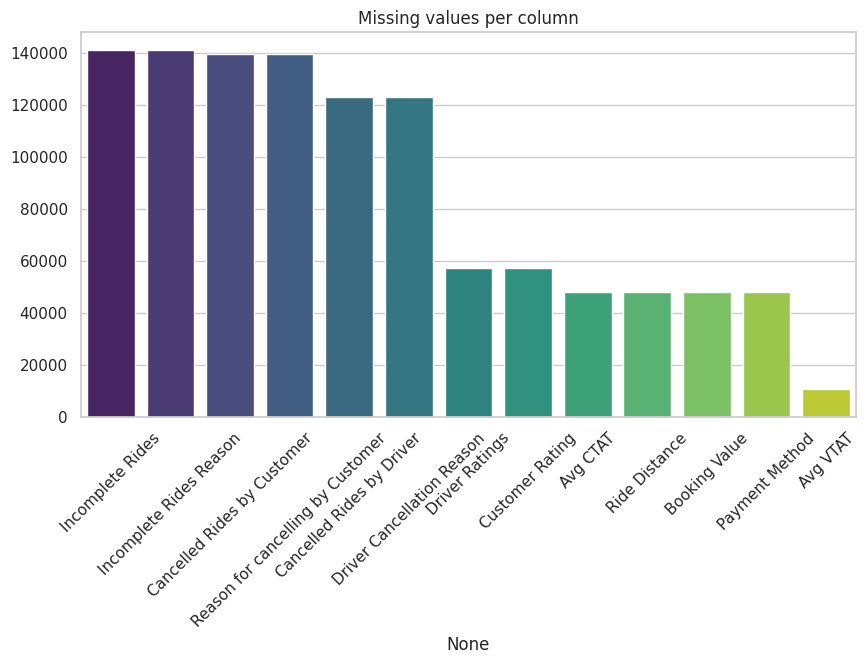

93000


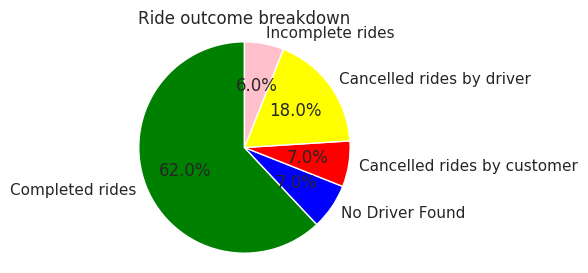

In [4]:
#calculating/showing missing or null values per column
missing=df.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
print("\n Missing values:")
print(missing)
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Missing values per column")
plt.show()

#total rides completed
nodriveer=df['Booking Status']=='No Driver Found'
totnodriveer=nodriveer.sum()
completedrides=df['Booking Status']=='Completed'
totcompletedrides=completedrides.sum()
print(totcompletedrides)
labels = ['Completed rides','No Driver Found','Cancelled rides by customer','Cancelled rides by driver','Incomplete rides']
values = [totcompletedrides,totnodriveer,df["Cancelled Rides by Customer"].dropna().sum(),df["Cancelled Rides by Driver"].dropna().sum(),df["Incomplete Rides"].dropna().sum()]
colors = ['green','blue','red','yellow','pink']
plt.figure(figsize=(3, 3))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Ride outcome breakdown')
plt.axis('equal')
plt.show()

Data cleaning and Imputation

In [7]:

    df.drop_duplicates(subset=None, keep='first', inplace=True)
    df=df.dropna(axis=1, thresh=len(df)*0.5)
    #categorical datacleaning
    for col in df.select_dtypes(include='object').columns:
        modeval=df[col].mode(dropna=True)
        if not modeval.empty:
            df[col]=df[col].fillna(modeval[0])

    #numerical datacleaning
    for col in df.select_dtypes(include='number').columns:
        skewval=df[col].skew()
        if -0.5<skewval<0.5:
            df[col]=df[col].fillna(df[col].mean())
            method="mean"
        else:
            df[col]=df[col].fillna(df[col].median())
            method="median"

        print(f"{col}: skew={skewval:.3f},method={method}")

Avg VTAT: skew=0.307,method=mean
Avg CTAT: skew=0.046,method=mean
Booking Value: skew=2.287,method=median
Ride Distance: skew=0.128,method=mean
Driver Ratings: skew=-0.656,method=median
Customer Rating: skew=-0.886,method=median


Univariate analysis and Outlier detection

In [ ]:
#numerical analysis
numcols=df.select_dtypes(include=np.number).columns
df[numcols].hist(figsize=(12,8),bins=20,color='skyblue')
plt.suptitle("Numeric feature distributions")
plt.show()
#categorical analysis
catcols=[col for col in df.select_dtypes(exclude=np.number).columns if df[col].nunique() < 10]
for col in catcols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df,x=col,palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"count plot:{col}")
    plt.show()

Bivariate analysis

In [ ]:
#noofrides vs ridetype
plt.figure(figsize=(8,5))
sns.countplot(data=df,x="Vehicle Type",hue="Payment Method", palette="pastel")
plt.title("Payment method usage across ride types")
plt.xlabel("Ride type")
plt.ylabel("Number of rides")
plt.legend(title="Payment method")
plt.show()

#ridedistance vs fare
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x="Ride Distance",y="Booking Value",alpha=0.6,color="teal")
plt.title("Ride distance vs Fare charges")
plt.xlabel("Distance (km)")
plt.ylabel("Fare (₹)")
plt.grid(alpha=0.5)
plt.show()

#avgfare vs bookingtime
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x="Hour",y="Booking Value",estimator="mean",color="steelblue")
plt.title("Average fare by booking hour")
plt.xlabel("hour of day")
plt.ylabel("Average fare (₹)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

#vehciletype vs avgbookingvalue
plt.figure(figsize=(8,5))
sns.barplot(data=df,x="Vehicle Type",y="Booking Value",estimator=np.mean,palette="viridis")
plt.title("Average booking value by vehicle type")
plt.xlabel("Vehicle type")
plt.ylabel("Average booking value (₹)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

#avgdistance by vehicletype
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x="Vehicle Type",y="Ride Distance",palette="mako")
plt.title("Average ride distance by ride type")
plt.xlabel("Ride type")
plt.ylabel("Avg distance (km)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

#correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[numcols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#noofridetypes vs hourofday
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='Hour', hue='Vehicle Type')
plt.title('Number of Rides by Hour of Day and Vehicle Type')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0,24))
plt.show()

Insights of EDA

1.from bivariate graph between noofrides vs ridetypes and univariate graph of vehicle types it can be seen most of customers use auto for travelling.

2.from univariate graph of payment method it can be seen most of customers use UPI for payments.

3.from bivariate graph it can be observed average booking value for vehicle types remains constant and distance covered for vehicle types is also consistent.

4.vehicles are used the most at 18th hour of day and least in morning.

5.avg booking value throught the day is almost the same and avg fare for all distances is also constant.
